# 패키지

In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

c:\Users\user\Desktop\Chunjae_edu\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 데이터

# 모델

In [ ]:
model = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSeq2SeqLM.from_pretrained(model)

# 의미 일관성 및 문법 평가 함수


def measure_sc(sentence):
    # 프롬프트
    prompt = (
        f"Evaluate the following sentence for both grammatical correctness and semantic coherence. "
        f"Answer only '1' if the sentence is both grammatically correct and semantically coherent. "
        f"Answer only '0' if the sentence has grammatical errors or lacks coherence.\n\n"
        f"Sentence: '{sentence}'\n\nAnswer with '1' or '0' only:\n\nScore:"
    )

    # 모델 입력
    inputs = tokenizer(prompt, return_tensors="pt")

    # 모델 예측 생성
    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=20)

    # 점수
    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    try:
        coherence_score = float(response_text.strip())
    except ValueError:
        coherence_score = None

    return coherence_score

In [ ]:
data = [
    ("Let me introduce my aunt.", 1),
    ("I am going to play soccer.", 1),
    ("The boy is my brother.", 1),
    ("Jimmy is going to exercise every day.", 1),
    ("The girl is my sister.", 1),
    ("Let me introduce my cousin to you.", 1),
    ("We are going to learn Korean history.", 1),
    ("I’m going to run a marathon.", 1),
    ("He is going to visit his grandpa.", 1),
    ("The woman is my mom.", 1),
    ("He set a new world record for swimming.", 1),
    ("Just sit down and relax for an hour.", 1),
    ("He repairs computers.", 1),
    ("The teacher repeated the question.", 1),
    ("The doctor reported that the patient recovered.", 1),
    ("The firefighters rescued children from the burning building.", 1),
    ("You will get your exam results next week.", 1),
    ("I reviewed the book before the test.", 1),
    ("I’m baking some bread.", 1),
    ("Bowling is boring.", 1),
    ("He is bringing a ring.", 1),
    ("I’m eating in the desert.", 1),
    ("A pig is digging in the garden.", 1),
    ("I’m feeding the monkeys.", 1),
    ("I’m leaving now.", 1),
    ("I’m seeking the K.", 1),
    ("You must brush your hair every day.", 1),
    ("Hello?", 1),
    ("You must wear your helmet.", 1),
    ("Hold on, please.", 1),
    ("You must stand in line at a bus stop.", 1),
    ("You have the wrong number.", 1),
    ("Can you get the phone for me?", 1),
    ("You must be quiet in the library.", 1),
    ("May I speak to Yuna?", 1),
    ("You must watch out for cars.", 1),
    ("We have art on Fridays.", 1),
    ("We have four classes today.", 1),
    ("Jenny is my classmate.", 1),
    ("I have English on Mondays.", 1),
    ("I do my homework every day.", 1),
    ("They have math on Thursdays.", 1),
    ("I have P.E. on Wednesdays.", 1),
    ("They have science on Tuesdays.", 1),
    ("You are good students.", 1),
    ("My textbook is on the desk.", 1),
    ("One by one, the stars appeared in the sky.", 1),
    ("We swam in the clear water.", 1),
    ("Did you hear that noise?", 1),
    ("Will I see you in the near future?", 1),
    ("Dad pays me five dollars for washing the car.", 1),
    ("I go to the church to pray.", 1),
    ("We stayed home last night and watched TV.", 1),
    ("She wiped the tears from her eyes.", 1),
    ("They live in a small house.", 1),
    ("I ordered a medium, not a large.", 1),
    ("My uncle runs a specialty coffee shop.", 1),
    ("Her favorite hobby is making dolls.", 1),
    ("She had no strength after her illness.", 1),
    ("He has a talent for acting.", 1),
    ("Friends are very important in our lives.", 1),
    ("You win some, you lose some.", 1),
    ("The plant is starting to grow flowers.", 1),
    ("Make hay while the sun shines.", 1),
    ("I need more space for books.", 1),
    ("Give me some water. I’ll water the plants.", 1),
    ("I’m sure I can win.", 1),
    ("Go and put on a clean shirt.", 1),
    ("The air in the city was always dirty.", 1),
    ("This cup is full, so be careful with it.", 1),
    ("Please recycle the empty bottles.", 1),
    ("It’s a true story.", 1),
    ("Is it true or false?", 1),
    ("He and his brother go to the same school.", 1),
    ("The students come from different school.", 1),
    ("The dog is helping the blind man.", 1),
    ("He wrote something on my palm.", 1),
    ("Which animals have lips?", 1),
    ("She put more effort into her studies.", 1),
    ("What day is it today?", 1),
    ("I saw her picture in the magazine.", 1),
    ("Mary is a smart girl.", 1),
    ("I don’t remember her phone number.", 1),
    ("Do you want some beef?", 1),
    ("Do you need a bottle?", 1),
    ("Do you need a bowl?", 1),
    ("I need a fork.", 1),
    ("Do you need a glass?", 1),
    ("I need a knife.", 1),
    ("Do you want some noodles?", 1),
    ("Do you need a plate?", 1),
    ("Do you want some soup?", 1),
    ("I need a spoon.", 1),
    ("There is a garden in my house.", 1),
    ("Tim and his dog are inside the room.", 1),
    ("There are many dishes in the sink.", 1),
    ("There is soap in the bathroom.", 1),
    ("There is a stove in the kitchen.", 1),
    ("What a surprise!", 1),
    ("There is a toilet in the bathroom.", 1),
    ("There is a toothbrush in the bathroom.", 1),
    ("There is toothpaste in the bathroom.", 1),
    ("Welcome to my house.", 1),
    ("I’m sorry, but I have to cancel the order.", 1),
    ("I bought some new clothes for the trip.", 1),
    ("We are collecting money for charity.", 1),
    ("It costs too much.", 1),
    ("How much is the fare to Busan?", 1),
    ("Your new dress fits well.", 1),
    ("I can’t see anything without my glasses.", 1),
    ("I don’t want to wear this jacket.", 1),
    ("Did you drop the vase?", 1),
    ("The fire started in the kitchen.", 1),
    ("Falling rocks are dangerous.", 1),
    ("The man was rich but not happy.", 1),
    ("The wind is not strong today.", 1),
    ("People are afraid of bombs.", 1),
    ("Please tell us the truth.", 1),
    ("I miss them both.", 1),
    ("Tony interacts well with other children in the class.", 1),
    ("The united nations is an international organization.", 1),
    ("You can find all kinds of information on the internet.", 1),
    ("The TV reporter did interviews with the movie star.", 1),
    ("There are many rocks on the surface of the moon.", 1),
    ("The news surprised me.", 1),
    ("They did a phone survey of TV programs.", 1),
    ("The plant survives on very little water.", 1),
    ("I’m carrying some cans.", 1),
    ("The cheerleader cheered the boy.", 1),
    ("The pool is full of people.", 1),
    ("She is hanging the shirt.", 1),
    ("I marked the item.", 1),
    ("I can raise the letters.", 1),
    ("He is reporting the news.", 1),
    ("The wind was wild.", 1),
    ("You look like a detective anyway.", 1),
    ("Would you like to try a Turkish dish?", 1),
    ("Which do you want, meat or fish?", 1),
    ("I’ve seen this movie once.", 1),
    ("Probably it’ll be all right.", 1),
    ("The farmer is sowing the seeds.", 1),
    ("Sometimes I visit my aunt with my sister.", 1),
    ("I’d like vegetable soup.", 1),
    ("The board is big.", 1),
    ("I have chalk.", 1),
    ("They are in the classroom.", 1),
    ("Here is some glue.", 1),
    ("They have notebooks.", 1),
    ("Look at this big green paper.", 1),
    ("Here is a pencil case.", 1),
    ("They are at school.", 1),
    ("Here is a school bag.", 1),
    ("Here are scissors.", 1),
    ("They cut the paper.", 1),
    ("Let’s draw.", 1),
    ("Let’s listen to the song.", 1),
    ("Do you play soccer?", 1),
    ("Let’s raise your hands.", 1),
    ("They read books.", 1),
    ("They see the rabbits.", 1),
    ("Do you speak English?", 1),
    ("Do you study English?", 1),
    ("Let’s write.", 1),
    ("There are many buildings in the city.", 1),
    ("They are my cousins.", 1),
    ("This is a baby duck.", 1),
    ("This goat is black.", 1),
    ("Tony is handsome.", 1),
    ("This horse is brown.", 1),
    ("Jenny is so lovely.", 1),
]

In [ ]:
data = [
    # 의미 일관성이 높은 문장 (50개)
    ("The dog barks loudly at night.", 1),
    ("She went to the store to buy some milk.", 1),
    ("The sun is very bright today.", 1),
    ("He reads a book every evening before bed.", 1),
    ("The students are working on their project together.", 1),
    ("The cat sleeps peacefully on the couch.", 1),
    ("She finishes her homework before dinner.", 1),
    ("The stars shine brightly in the night sky.", 1),
    ("He drinks a cup of coffee every morning.", 1),
    ("The children play soccer in the park.", 1),
    ("She waters the plants in her garden.", 1),
    ("Birds sing beautifully in the early morning.", 1),
    ("The teacher explains the lesson clearly.", 1),
    ("They enjoy a picnic by the lake.", 1),
    ("The book lies open on the table.", 1),
    ("The flowers bloom in the springtime.", 1),
    ("He jogs along the river every evening.", 1),
    ("The sun sets slowly over the mountains.", 1),
    ("She bakes cookies for her family.", 1),
    ("The rain falls gently on the roof.", 1),
    ("The dog wags its tail happily.", 1),
    ("She organizes her desk every Friday.", 1),
    ("The coffee shop opens at 8 a.m.", 1),
    ("They travel to the countryside on weekends.", 1),
    ("He exercises daily for his health.", 1),
    ("The phone rings loudly in the room.", 1),
    ("She paints beautiful landscapes in her free time.", 1),
    ("The movie starts at 7 p.m. sharp.", 1),
    ("The snow covers the ground in winter.", 1),
    ("The chef prepares a delicious meal.", 1),
    ("He writes a letter to his friend.", 1),
    ("The sun rises over the calm ocean.", 1),
    ("The students listen attentively to the lecture.", 1),
    ("She wears a warm coat in cold weather.", 1),
    ("The music plays softly in the background.", 1),
    ("The car drives smoothly down the road.", 1),
    ("He arranges flowers in a vase.", 1),
    ("The children laugh and play together.", 1),
    ("The bus arrives at the station on time.", 1),
    ("She studies for her exams every night.", 1),
    ("The candle flickers in the dark room.", 1),
    ("They celebrate birthdays with friends.", 1),
    ("He builds a model airplane for fun.", 1),
    ("The ocean waves crash against the shore.", 1),
    ("She enjoys reading novels at the library.", 1),
    ("The park is filled with people on weekends.", 1),
    ("He practices the guitar every afternoon.", 1),
    ("The city lights shine in the distance.", 1),
    ("She draws sketches of animals in her notebook.", 1),
    ("The bird flies gracefully through the sky.", 1),
    ("They explore new places every holiday.", 1),
    # 의미 일관성이 낮은 문장 (50개)
    ("The apple sings softly to the wind.", 0),
    ("She quickly swims through the library shelves.", 0),
    ("The car danced across the road.", 0),
    ("They painted the silence with laughter.", 0),
    ("The sky ate all the music at sunset.", 0),
    ("The book flew through the crowded market.", 0),
    ("The mountain whispered to the sleeping valley.", 0),
    ("Her laughter shattered the still ocean.", 0),
    ("The clock melted under the morning sun.", 0),
    ("The shadows whispered secrets to the ground.", 0),
    ("The candle laughed at the darkness.", 0),
    ("The river decided to run uphill today.", 0),
    ("The tree danced to the melody of silence.", 0),
    ("The stone dreamed of flying to the moon.", 0),
    ("The stars sang a lullaby to the ocean.", 0),
    ("The wind painted stories in the clouds.", 0),
    ("The table grew tired of holding dishes.", 0),
    ("The chair sighed under the weight of silence.", 0),
    ("The rain whispered to the sleeping grass.", 0),
    ("The wall listened to the secrets of the room.", 0),
    ("The pen laughed as it wrote nonsense.", 0),
    ("The waves hugged the shore tightly.", 0),
    ("The thunder danced across the mountains.", 0),
    ("The ice melted into whispers of the past.", 0),
    ("The leaves argued with the ground.", 0),
    ("The mirror hid its own reflection.", 0),
    ("The shoe wandered off alone in the night.", 0),
    ("The clock argued with the silence of the room.", 0),
    ("The flame giggled in the breeze.", 0),
    ("The river danced with the rocks.", 0),
    ("The night wrapped itself in stars.", 0),
    ("The pillow dreamt of flying through clouds.", 0),
    ("The mountain sighed at the fading sun.", 0),
    ("The ocean hid its secrets in waves.", 0),
    ("The road whispered to the passing cars.", 0),
    ("The snow sang softly as it fell.", 0),
    ("The tree held hands with the wind.", 0),
    ("The sun forgot to rise today.", 0),
    ("The door blinked at the sunlight.", 0),
    ("The garden danced under the moonlight.", 0),
    ("The carpet dreamed of walking.", 0),
    ("The spoon argued with the fork.", 0),
    ("The book sighed in relief.", 0),
    ("The clouds played hide and seek.", 0),
    ("The chair whispered to the floor.", 0),
    ("The sun hid behind the ocean's edge.", 0),
    ("The stars argued about their brightness.", 0),
    ("The mountains laughed at the tiny hill.", 0),
    ("The grass waved goodbye to the trees.", 0),
    ("The moon hummed a song to the stars.", 0),
    ("The rock felt lonely on the riverbank.", 0),
]

In [ ]:
data = [
    "I have an aunt who lives nearby.",
    "I’m going to the concert hall.",
    "I scanned the boy.",
    "I exercise every morning to stay healthy.",
    "Let me introduce my cousin to you.",
    "We all learn by doing things every day.",
    "He starts to run a race.",
    "Let's visit the place and we go to the museum.",
    "I can't fulfill this request.",
    "Let's play the recorder every day.",
    "The man is fixing his car.",
    "I will say this only once, so listen carefully.",
    "He is reporting the news on television tonight.",
    "I reviewed the book before the test.",
    "I’m baking some bread. I’m a cook.",
    "My foot hurts and I need ice cream.",
    "I’m leaving now, and I’ll be on time.",
    "I want steak because I'm hungry.",
    "You must wear your helmet when playing baseball.",
    "You must stand in line at a bus stop.",
    "I’m counting numbers on my phone right now.",
    "Can you get the phone for me?",
    "Let's go out and watch out for cars!",
    "They are artists who love to create art.",
    "I must study English to improve my skills.",
    "I have to do my homework every day.",
    "I’m a student, and you are good students.",
    "The textbook belongs to me.",
    "We swam in the clear water. It's clean.",
    "I can't hear your voice.",
    "I will see you in the near future.",
    "I should pay these bills this month.",
    "Take care, you should stay at home today.",
    "She wiped the tears from her eyes.",
    "I ordered a medium, not a large.",
    "I ordered a medium, not a large size.",
    "I ordered a medium, it's big.",
    "My uncle runs a specialty coffee shop.",
    "The player has strong legs.",
    "He has a talent for music.",
    "I’m at home.",
    "She is about to pick the plant.",
    "It’s sunny.\n\nThat light is dark.",
    "We can travel by spaceship to explore space.",
    "They want water.",
    "You win some, you lose some.",
    "I’m full.",
    "We’re honest, you’re kind, and I agree with you.",
    "We’re honest.'",
    "I miss them both.",
    "He has a handicap of being blind.",
    "Hard work brings its own rewards.",
    "I saw her picture in the magazine.",
    "We will never forget it.",
    "I want steak.",
    "I should recycle the empty bottles.",
    "Do you need a bowl because it has stains on it?",
    "I need a fork.",
    "I need a knife.",
    "I want spaghetti and I want sandwiches.'",
    "He tossed the toast onto the plate.",
    "I need a spoon.",
    "We are planting flowers in my house garden with Grandfather.",
    "The sink is new and has many dishes.",
    "The soap is soaked in the bathroom.",
    "The stove is big and I’m a cook.",
    "The news surprised me with this gift.",
    "I brush my teeth and I want gum.",
    "I’m sorry, but I have to cancel the order.",
    "We are collecting money for charity and she collects stamps.",
    "The watch costs too much for adults.",
    "I have two tickets and need to buy more for Busan.",
    "The rock is rocking very hard.",
    "People are afraid of bombs when they go on a picnic.",
    "I like telling jokes and we’re honest.",
    "I like both of them.",
    "The TV reporter did interviews with the movie star.",
    "The teacher said touch your cheek with glue.",
    "We have a quiz tomorrow.",
    "She survived in the survival game.",
    "I’m carrying some cans; don’t carry that chair.",
    "The cheerleader cheered the boy.",
    "I can raise the letters.",
    "I like camping and visiting wild animal parks.",
    "Can you get the dish for me?",
    "We like steak.",
    "I’ve seen this movie once.",
    "I hope so.",
    "The farmer is sowing the seeds.",
    "I sometimes play chess with my sister.",
    "I would like some vegetables.",
    "The board is big and I sometimes play chess.",
    "I have chalk on the blackboard.",
    "I do not have a new notebook.",
    "I go to school and ride my bike after school.",
    "Be quiet while we listen to the song.",
    "You have to play outside every day.",
    "Look out! The dog is coming near you.",
    "I must study English every day.",
    "Let's write on the blackboard with pencils.",
    "I’m building a building with many floors.",
    "The sheep looks cute and the lambs look adorable.",
    "You have a cute smile. Keep smiling.",
    "I have some questions and I’m bored.'",
    "The boring movie ended finally.",
    "I have a habit of waking up late in the morning.",
    "I have dinner.",
    "We’re honest and I’m serious about this.'",
    "I often stay up late and stand up.",
    "I eat lots of sweets and I don’t like sugar.",
    "I want chicken.",
    "He starts to run the race.",
    "They go on a trip every weekend.",
    "The girl wrinkled her eyebrows while I wash my face.",
    "We need fresh air to stay healthy.",
    "Let's have a party.",
    "It’s a pumpkin for Halloween and Thanksgiving.",
    "The bread smells good.",
    "I hurt my head playing baseball.",
    "I passed my exam after a long wait.",
    "You should lock your locker. It is my key.",
    "I'm shooting at the goal.",
    "She is swinging the swing.",
    "The teacher said probably it’ll be all right.",
    "I have a pair of shoes and we are wearing pants.",
    "The news surprised me.",
    "I’m great, nice to meet you.",
    "Wet places get wetter and dry places get drier.",
    "You can do it if you try hard.",
    "I am slow and lazy, so I clean my room.",
    "I know the answer!",
    "You can ask the questions and get answers.",
    "You must wear your helmet when riding bikes.",
    "I have some questions about my homework.",
    "I think the picture is funny.",
    "I think he is hungry.",
    "I have a million won and I’m full.",
    "The announcer announced He is reporting the news.",
    "I think it’s a good idea.",
    "I’m counting numbers. Count how many eggs there are.",
    "The guide is guiding us through the forest.",
    "The game ends at five.",
    "She perceived that she placed first and turned right.",
    "I’m lying on the floor.",
    "I have two tickets for tomorrow's event.",
    "I like camping and we will go camping.",
    "You have to answer my questions carefully today.",
    "I will go jogging with Brandy tomorrow morning.",
    "Let's make a plan for our vacation.",
    "I will catch the ball.",
    "I can't believe the news about my friends.",
    "I play the role of Pinocchio.",
    "I’m bored because it’s hot outside.",
    "I need your help to finish my project.",
    "Nobody lived on the island.",
    "We should recycle bottles to save money.",
    "We have a history class today to study African history.",
    "I have two hundred dollars.",
    "I want milk and I like butter.",
    "I buy some vegetables every day.",
    "I don’t like corn.",
    "I don’t like pepper.",
    "I don’t like potatoes, tomatoes are vegetables.",
    "I don’t like sugar because many foods contain it.",
    "I don’t like tomatoes.",
    "I like watermelons and would cut the watermelon in half.",
    "My mom has a red dress.",
    "My dad has blue shorts.",
    "My sister has a green vest.",
    "I’ll call you again when I arrive.",
    "He can’t contact anyone because he forgot his phone number.",
    "Leaves are falling.'",
    "I went to the park with my friends.",
    "I’m shooting at the goal.",
    "I’m from Seoul, Korea.",
    "I promise I’ll come back tomorrow.",
    "She delivers mail to people.",
    "I replied to his reply.",
    "We all learn by doing things ourselves.",
    "Let's gather in the room.",
    "You may use my pen to write on paper.",
    "The cake has a round shape.",
    "The ring has the shape of a circle.",
    "I like to swim in the sea, not in a pool.",
    "Children swam and played in the waves.",
    "We are going to a concert.",
    "I feel tired.",
    "My finger hurts and my toe hurts.",
    "They listen to music every Friday afternoon.",
    "We should protect the environment and wash your face.",
    "I'll send you a text message.",
    "Let's throw a ball straight and I can fly.",
    "Time flies like an arrow.",
    "I'm a cook and I boil the water.",
    "I want gum, touch your mouth, brush teeth, don’t bite nails.",
    "The glass needs to be filled completely.",
    "I’m wrapping the food, Fold the paper like this.",
    "I'm patting my pets.",
    "I tied my necktie for school today.",
    "I enjoy eating ice cream for dessert.",
    "My mom decided to go on a diet.",
    "I ordered them to line up.",
    "I’m thirsty. Give me some juice.",
    "I won first prize in the English speech contest.",
    "He won the match.",
    "I’m good at passing a ball.",
    "I’m good at throwing a ball.",
    "I’m building a building.",
    "Practice makes perfect when you practice every day.",
    "Many teenagers experience fast growth during adolescence.",
    "I turned left and promised to return safely.",
    "I go to ABC Elementary School with my friends.",
    "It takes an hour to get home now.",
    "Can you join us?",
    "Let's draw while you go along this way.",
    "I like purple.",
    "I have a pair of shoes.",
    "This towel feels soft and it's a hard ball.",
]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


# 의미 일관성 및 문법 평가 함수
def measure_sc(sentence):
    # 프롬프트
    prompt = (
        f"Evaluate the following sentence for both grammatical correctness and semantic coherence. "
        f"Answer only '1' if the sentence is both grammatically correct and semantically coherent. "
        f"Answer only '0' if the sentence has grammatical errors or lacks coherence.\n\n"
        f"Sentence: '{sentence}'\n\nAnswer with '1' or '0' only:"
    )

    # 모델 입력
    inputs = tokenizer(prompt, return_tensors="pt")

    # 모델 예측 생성
    with torch.no_grad():
        outputs = model.generate(**inputs, max_length=5)

    # 점수
    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # 0 또는 1로 변환
    if response_text == "1":
        return 1
    elif response_text == "0":
        return 0
    else:
        return None  # 예상치 못한 응답이 있을 경우 None 반환


# 예시 문장 평가
count = 0
for d in data:
    score = measure_sc(d)
    if score == 1:
        count += 1
        print(count)

# sentence = [d for d in data]
# score = measure_sc(sentence)
# print("Score:", score)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157


In [ ]:
# 예측과 실제 라벨 비교
correct_predictions = 0
total_predictions = len(data)

for sentence, true_label in data:
    predicted_score = measure_sc(sentence)
    # 예측 점수를 이진 라벨로 변환 (1.0이면 1, 그 외는 0)
    predicted_label = 1 if predicted_score == 1.0 else 0

    # print(f"Sentence: {sentence}")
    # print(f"True Label: {true_label}, Predicted Label: {predicted_label}\n")

    # 정확도 계산
    if predicted_label == true_label:
        correct_predictions += 1
    else:
        print(f"{sentence}")
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}\n")

accuracy = correct_predictions / total_predictions
print(f"정확도: {accuracy * 100:.2f}%")
# if true_label != predicted_label:
#     print(f"sentence:{sentence}")

Sentence: I have an aunt who lives nearby. Predicted score:None
Sentence: I’m going to the concert hall. Predicted score:None
Sentence: I scanned the boy. Predicted score:None
Sentence: I exercise every morning to stay healthy. Predicted score:None
Sentence: Let me introduce my cousin to you. Predicted score:None
Sentence: We all learn by doing things every day. Predicted score:None
Sentence: He starts to run a race. Predicted score:None
Sentence: Let's visit the place and we go to the museum. Predicted score:None
Sentence: I can't fulfill this request. Predicted score:None


KeyboardInterrupt: 

# 예측

In [ ]:
# 예측과 실제 라벨 비교
correct_predictions = 0
total_predictions = len(data)

for sentence, true_label in data:
    predicted_score = measure_sc(sentence)
    # 예측 점수를 이진 라벨로 변환 (1.0이면 1, 그 외는 0)
    predicted_label = 1 if predicted_score == 1.0 else 0

    # print(f"Sentence: {sentence}")
    # print(f"True Label: {true_label}, Predicted Label: {predicted_label}\n")

    # 정확도 계산
    if predicted_label == true_label:
        correct_predictions += 1
    else:
        print(f"{sentence}")
        print(f"True Label: {true_label}, Predicted Label: {predicted_label}\n")

accuracy = correct_predictions / total_predictions
print(f"정확도: {accuracy * 100:.2f}%")
# if true_label != predicted_label:
#     print(f"sentence:{sentence}")

Let me introduce my aunt.
True Label: 1, Predicted Label: 0

I am going to play soccer.
True Label: 1, Predicted Label: 0

The boy is my brother.
True Label: 1, Predicted Label: 0

Jimmy is going to exercise every day.
True Label: 1, Predicted Label: 0

The girl is my sister.
True Label: 1, Predicted Label: 0

Let me introduce my cousin to you.
True Label: 1, Predicted Label: 0

We are going to learn Korean history.
True Label: 1, Predicted Label: 0

I’m going to run a marathon.
True Label: 1, Predicted Label: 0

He is going to visit his grandpa.
True Label: 1, Predicted Label: 0

The woman is my mom.
True Label: 1, Predicted Label: 0

He set a new world record for swimming.
True Label: 1, Predicted Label: 0

Just sit down and relax for an hour.
True Label: 1, Predicted Label: 0

He repairs computers.
True Label: 1, Predicted Label: 0

The teacher repeated the question.
True Label: 1, Predicted Label: 0

The doctor reported that the patient recovered.
True Label: 1, Predicted Label: 0


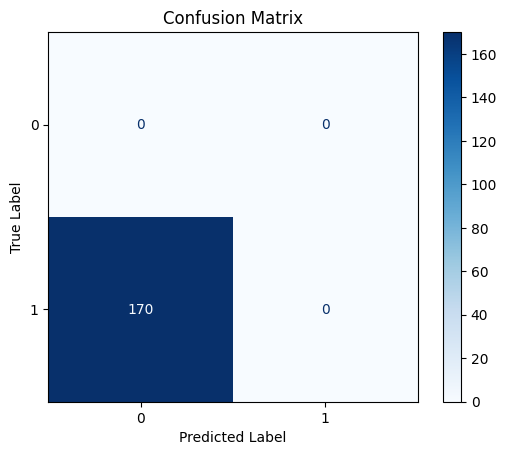

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 실제 라벨과 예측 라벨 저장
true_labels = []
predicted_labels = []

for sentence, true_label in data:
    predicted_score = measure_sc(sentence)
    # 예측 점수를 이진 라벨로 변환 (1.0이면 1, 그 외는 0)
    predicted_label = 1 if predicted_score == 1.0 else 0

    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# 혼동 행렬 계산
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# 혼동 행렬 시각화
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()